In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import xarray as xr
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [25]:
'''
"/g/data/ik11/outputs/access-om2-025/025deg_jra55_iaf_omip2_cycle1/output*/ocean/ocean_scalar.nc"
"/g/data/ik11/outputs/access-om2-025/025deg_jra55_iaf_omip2_cycle2/output*/ocean/ocean_scalar.nc"
"/g/data/ik11/outputs/access-om2-025/025deg_jra55_iaf_omip2_cycle3/output*/ocean/ocean_scalar.nc"
"/g/data/ik11/outputs/access-om2-025/025deg_jra55_iaf_omip2_cycle4/output*/ocean/ocean_scalar.nc"
"/g/data/ik11/outputs/access-om2-025/025deg_jra55_iaf_omip2_cycle5/output*/ocean/ocean_scalar.nc"
"/g/data/ik11/outputs/access-om2-025/025deg_jra55_iaf_omip2_cycle6/output*/ocean/ocean_scalar.nc"
'''
# --- read data ---
idir = '/g/data/ik11/outputs/access-om2-025/'
f1Name = '025deg_jra55_iaf_omip2_cycle1/output*/ocean/ocean_scalar.nc'
f2Name = '025deg_jra55_iaf_omip2_cycle2/output*/ocean/ocean_scalar.nc'
f3Name = '025deg_jra55_iaf_omip2_cycle3/output*/ocean/ocean_scalar.nc'
f4Name = '025deg_jra55_iaf_omip2_cycle4/output*/ocean/ocean_scalar.nc'
f5Name = '025deg_jra55_iaf_omip2_cycle5/output*/ocean/ocean_scalar.nc'
f6Name = '025deg_jra55_iaf_omip2_cycle6/output*/ocean/ocean_scalar.nc'

# Open a netCDF data file using xarray default engine and load the data into xarrays
ds1 = xr.open_mfdataset(idir+f1Name, combine='by_coords')
ds2 = xr.open_mfdataset(idir+f2Name, combine='by_coords')
ds3 = xr.open_mfdataset(idir+f3Name, combine='by_coords')
ds4 = xr.open_mfdataset(idir+f4Name, combine='by_coords')
ds5 = xr.open_mfdataset(idir+f5Name, combine='by_coords')
ds6 = xr.open_mfdataset(idir+f6Name, combine='by_coords')

# Use date as the dimension rather than time
year_start = 550
year_end = 599
#df = ds.sel(time=(ds['time.year'] >= year_start) & (ds['time.year'] <= year_end)) # 192 x 144



In [26]:
ke_tot = xr.concat([ds1.ke_tot, ds2.ke_tot, ds3.ke_tot, ds4.ke_tot, ds5.ke_tot, ds6.ke_tot], dim='time')
ke_tot

<xarray.DataArray 'ke_tot' (time: 4392, scalar_axis: 1)>
dask.array<concatenate, shape=(4392, 1), dtype=float32, chunksize=(12, 1), chunktype=numpy.ndarray>
Coordinates:
  * scalar_axis  (scalar_axis) float64 0.0
  * time         (time) datetime64[ns] 1958-01-14T12:00:00 ... 2018-12-14T12:...
Attributes:
    long_name:      Globally integrated ocean kinetic energy
    units:          10^15 Joules
    valid_range:    [0.e+00 1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

[[1349.5398]
 [1503.4889]
 [1653.4885]
 [1802.051 ]
 [1906.5773]
 [2012.8776]
 [2082.8367]
 [2138.6582]
 [2231.3174]
 [2209.8508]] [1877.3896]


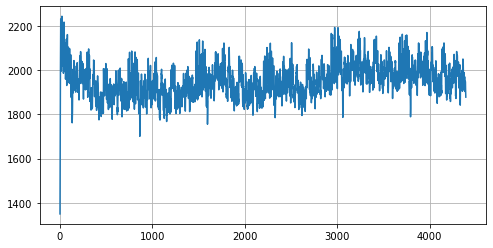

In [37]:
fig = plt.figure(figsize=(8, 4))
plt.plot(ke_tot)
plt.grid()
plt.savefig('/g/data/p66/ars599/work_moc/ke_tot_025deg_jra55_iaf_omip2.png', dpi=120)

print(ke_tot[0:10].values, ke_tot[-1].values)